# Binary Classification Problem
The aim of this challenge is to develop a model that predicts which passengers survive and which do not.

From looking at the table we can see that the survival rate was captured using a binary (0,1) system. Our method for prediction therefore will also have a binary format, meaning we will be using binary classification. 

## Exploring the data
First load we need to load the data using the pandas.read_csv() function.

The data provided by kaggle is already split into train and testing datasets.


In [1]:
import pandas as pd

test_data = pd.read_csv("./data/test.csv")
train_data = pd.read_csv("./data/train.csv")

test_data_shape = test_data.shape
train_data_shape = train_data.shape

print(test_data_shape)
print(train_data_shape)

(418, 11)
(891, 12)


## DataFrame.shape
This allows us to see how many rows and columns are in our Dataset.

We have 418 entries and 11 variables in our test dataset.

We have 891 entries and 12 variables in our train dataset.


First let us get an overview of what our data looks like.

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Variables used to predict the outcome
We now need to consider which variables listed at the top are going to affect our prediction. To start with, we will look at sex, passenger class and age as predictors.

The matplotlib library will be used here to visualise the variables.

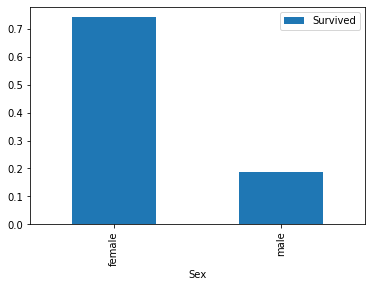

In [3]:
import matplotlib.pyplot as plt

gender_table = train_data.pivot_table(index = "Sex", values = "Survived")
gender_table

gender_table.plot.bar()
plt.show()

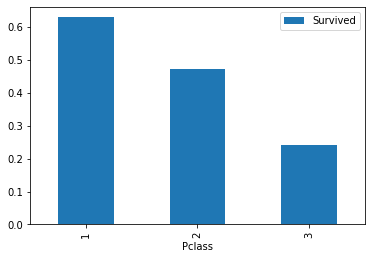

In [5]:
passenger_class_table = train_data.pivot_table(index = "Pclass", values = "Survived")
passenger_class_table

passenger_class_table.plot.bar()
plt.show()

## First impressions
Here we can see that female passengers were more likely to survive than male passengers. Those travelling in first class also had a greater chance of survival than those in the other two classes.

## Let us have a look at the age column
Age ist a metric variable - the first two were categorical variables.

Using the describe() function we can get an overview of metric variables.

In [10]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## Age column
Here we can see that age ranges from 0,42 to 80,0. The average passenger was about 30 years old. There also seem to missing values, seeing as we have here 714 entries for the variable compared to the 814 total entries.

We will need to consider this, when using the variable.

Using a histogram, we can explore the data.

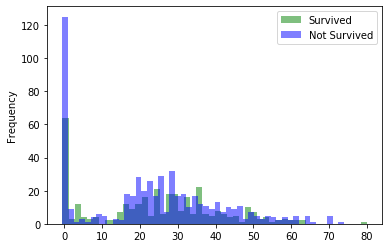

In [5]:
age_survived = train_data[train_data["Survived"] == 1]
age_not_survived = train_data[train_data["Survived"] == 0]

age_survived["Age"].plot.hist(alpha = 0.5, color = 'green', bins = 50)
age_not_survived["Age"].plot.hist(alpha = 0.5, color = 'blue', bins = 50)

plt.legend(["Survived", "Not Survived"])
plt.show()

In some age categories we can see that more passengers survived than others.

In order to use this variable in our machine learning model, we can convert the age variable into a categorical one.

Any changes we make to the training data, we also need to make to the testing data. 

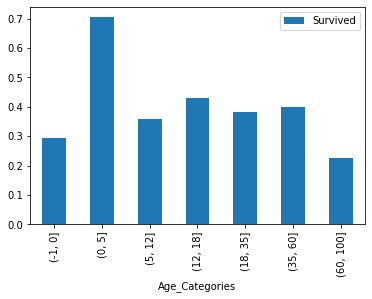

In [17]:
def convert_age(df, cut_off_values, label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_Categories"] = pd.cut(df["Age"], cut_off_values, label_names)
    return df

cut_off_values = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

train_data = convert_age(train_data, cut_off_values, label_names)
test_data = convert_age(test_data, cut_off_values, label_names)

age_plot = train_data.pivot_table(index = "Age_Categories", values = "Survived")
age_plot.plot.bar()
plt.show()

Here we can see that the infant age category had the highest survival rate.

We have identified the variables we need for our machine learning model.

## Preparing our data for machine learning

We can now prepare our data for machine learning. The computer does not understand text, which means we will have to convert this into numbers. 

In [18]:
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummies], axis = 1)
    return df

train_data = create_dummies(train_data, "Pclass")
test_data = create_dummies(test_data, "Pclass")

train_data = create_dummies(train_data, "Age_Categories")
test_data = create_dummies(test_data, "Age_Categories")

train_data = create_dummies(train_data, "Sex")
test_data = create_dummies(test_data, "Sex")

train_data.head(10)
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_3,"Age_Categories_(-1, 0]","Age_Categories_(0, 5]","Age_Categories_(5, 12]","Age_Categories_(12, 18]","Age_Categories_(18, 35]","Age_Categories_(35, 60]","Age_Categories_(60, 100]",Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,0,0,0,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0,0,0,0,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,0,0,0,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,0,0,0,0,1,0,0,1,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,...,1,0,0,0,1,0,0,0,0,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,...,1,0,0,0,0,1,0,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,...,0,0,0,0,0,1,0,0,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,...,1,0,0,0,1,0,0,0,1,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,...,1,0,0,0,0,1,0,0,0,1


## Machine Learning Model

We can now start training our first model. We will start with a logistic regresion model, which is usually the first model enountered when doing classification work. 

The models contained within the scikit-learn library follow these steps:
* Create the model you want to use
* Fit the model to the training data
* Use the model to make predictions
* Evaluate the accuracy of the predictions
* Every model in scikit-learn is created as a separate class, we therefore need to know which class we want to use - here it is the logistic regressions class

In [19]:
from sklearn.linear_model import LogisticRegression

column_names = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_Categories_(-1, 0]', 'Age_Categories_(0, 5]', 
       'Age_Categories_(5, 12]','Age_Categories_(12, 18]',
       'Age_Categories_(18, 35]','Age_Categories_(35, 60]', 'Age_Categories_(60, 100]']

lr = LogisticRegression()

lr.fit(train_data[column_names], train_data['Survived'])

/home/fiorentina/.local/share/virtualenvs/kaggle-titanic-TNh3-Hi0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Making predictions

After training our model above we can now test to see how good it is. In order for us to do this, we will need to make predictions using our model. 

We will be splitting our training dataset into train and test sets. The scikit-learn library has a handy funtion to handle the splitting our the dataset.

In [22]:
from sklearn.model_selection import train_test_split

column_names = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_Categories_(-1, 0]', 'Age_Categories_(0, 5]', 
       'Age_Categories_(5, 12]','Age_Categories_(12, 18]',
       'Age_Categories_(18, 35]','Age_Categories_(35, 60]', 'Age_Categories_(60, 100]']

all_X = train_data[column_names]
all_Y = train_data['Survived']

train_X, test_X, train_Y, test_Y = train_test_split(all_X, all_Y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

lr.fit(train_X, train_Y)

predictions = lr.predict(test_X)

accuracy = accuracy_score(test_Y, predictions)

accuracy

/home/fiorentina/.local/share/virtualenvs/kaggle-titanic-TNh3-Hi0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8100558659217877

In [30]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_Y, predictions)

pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index = [['Survived', 'Died']])

,Survived,Died
Survived,96,14
Died,20,49


## Cross-validation

We can now see how effective our model really is by cross validating it.

Again, scikit-learn has a function for this purpose.

In [32]:
from sklearn.model_selection import cross_val_score

import numpy as np

lr = LogisticRegression()
val_scores = cross_val_score(lr, all_X, all_Y, cv = 10)
np.mean(val_scores)

/home/fiorentina/.local/share/virtualenvs/kaggle-titanic-TNh3-Hi0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fiorentina/.local/share/virtualenvs/kaggle-titanic-TNh3-Hi0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fiorentina/.local/share/virtualenvs/kaggle-titanic-TNh3-Hi0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fiorentina/.local/share/virtualenvs/kaggle-titanic-TNh3-Hi0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence thi

0.8002698331630915

We can now make predictions using our unseen data.

In [33]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_3,"Age_Categories_(-1, 0]","Age_Categories_(0, 5]","Age_Categories_(5, 12]","Age_Categories_(12, 18]","Age_Categories_(18, 35]","Age_Categories_(35, 60]","Age_Categories_(60, 100]",Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,0,0,0,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0,0,0,0,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,0,0,0,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,0,0,0,0,1,0,0,1,0


In [35]:
lr = LogisticRegression()
lr.fit(all_X, all_Y)
test_data_predictions = lr.predict(test_data[column_names])
test_data_predictions

/home/fiorentina/.local/share/virtualenvs/kaggle-titanic-TNh3-Hi0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

Using the code below, we can now make a submission to the kaggel website.

In [36]:
test_data_ids = test_data["PassengerId"]
submission_df = {"PassengerId": test_data_ids,
                 "Survived": test_data_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv('titanic_submission.csv', index = False)

We can try and improve our predictions score by:
* Features Engineering - creating new features from the existing ones
* Feature Selection - selecting new oder different features to reduce noise and prevent overfitting
* Model Selection - Try different models to improve performance
* Hyperparameter Optimization - Optimize Settings within each of the machine learning models